# Домашняя работа №2
# Студент: Правилов Михаил

In [415]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
import math
getcontext().prec = 60

# Задание 1

## Задание 1А

Чтобы написать написать функцию, вычисляющую интерполяционный полином Лагранжа надо просто принимать на вход узлы и значения в них и возвращать функцию - полином Лагранжа.

In [422]:
def get_Lagrange_polinom(initial_points):
    def lagrange_polinom(x):
        result = 0
        for k in range(len(initial_points)):
            x_k = initial_points[k][0]
            f_k = initial_points[k][1]
            product = 1
            for i in range(len(initial_points)):
                if i != k:
                    x_i = initial_points[i][0]
                    product *= (x - x_i) / (x_k - x_i)
            result += f_k * product
        return result
    return lagrange_polinom

"Вычислите интерполяционный полином Лагранжа для функции $f_S(x) = xsin(2x)$ на интервале $[x_0 - 5; x_0 + 5]$ с равномерно распределенными узлами"

На вход принимаем $x_0$ и N - количество точек минус один, по которым надо все строить. Длина промежутка 10, поэтому шаг будет $10 / N$.

In [423]:
x_0_first = np.longdouble(100)
length_first = np.longdouble(5)

def f_S(x):
    return x * np.longdouble(math.sin(2 * x))
    
def get_Lagrange_polinom_for_f(x_0, length, N, f):
    step = 10 / N
    left = x_0 - length
    right = x_0 + length
    x_cur = left
    initial_points = []
    while x_cur <= right:
        initial_points.append((x_cur, f(x_cur)))
        x_cur += step
    return get_Lagrange_polinom(initial_points)

"Постройте график погрешности, найдите ее максимальное значение для $x_0 = 100$ и $N = 5, 10, 15$ (используйте для построения результата не менее нескольких сотен точек!) Объясните полученные результаты."

Возьмем шаг 500. То есть посмотрим погрешность в 501 точке на интервале от 95 до 105. 

In [424]:
def draw_error(x_0, length, N, color, f):
    lagrange_f_S = get_Lagrange_polinom_for_f(x_0, length, N, f)
    left = x_0 - length
    right = x_0 + length
    data_x = []
    data_y = []
    number_of_points = np.longdouble(500)
    step = 10 / number_of_points
    x_cur = left
    max_error = -1
    while x_cur <= right:
        data_x.append(x_cur)
        error = abs(f_S(x_cur) - lagrange_f_S(x_cur))
        data_y.append(error)
        max_error = max(max_error, error)
        x_cur += step
    plt.subplot(211)
    plt.title("Error for x_0 = " + str(x_0))
    plt.plot(data_x, data_y, color)
    plt.ylabel("|f_S(x) - lagrange_f_S(x)|")
    plt.xlabel("x")
    return max_error

Посмотрим на каждый график по отдельности

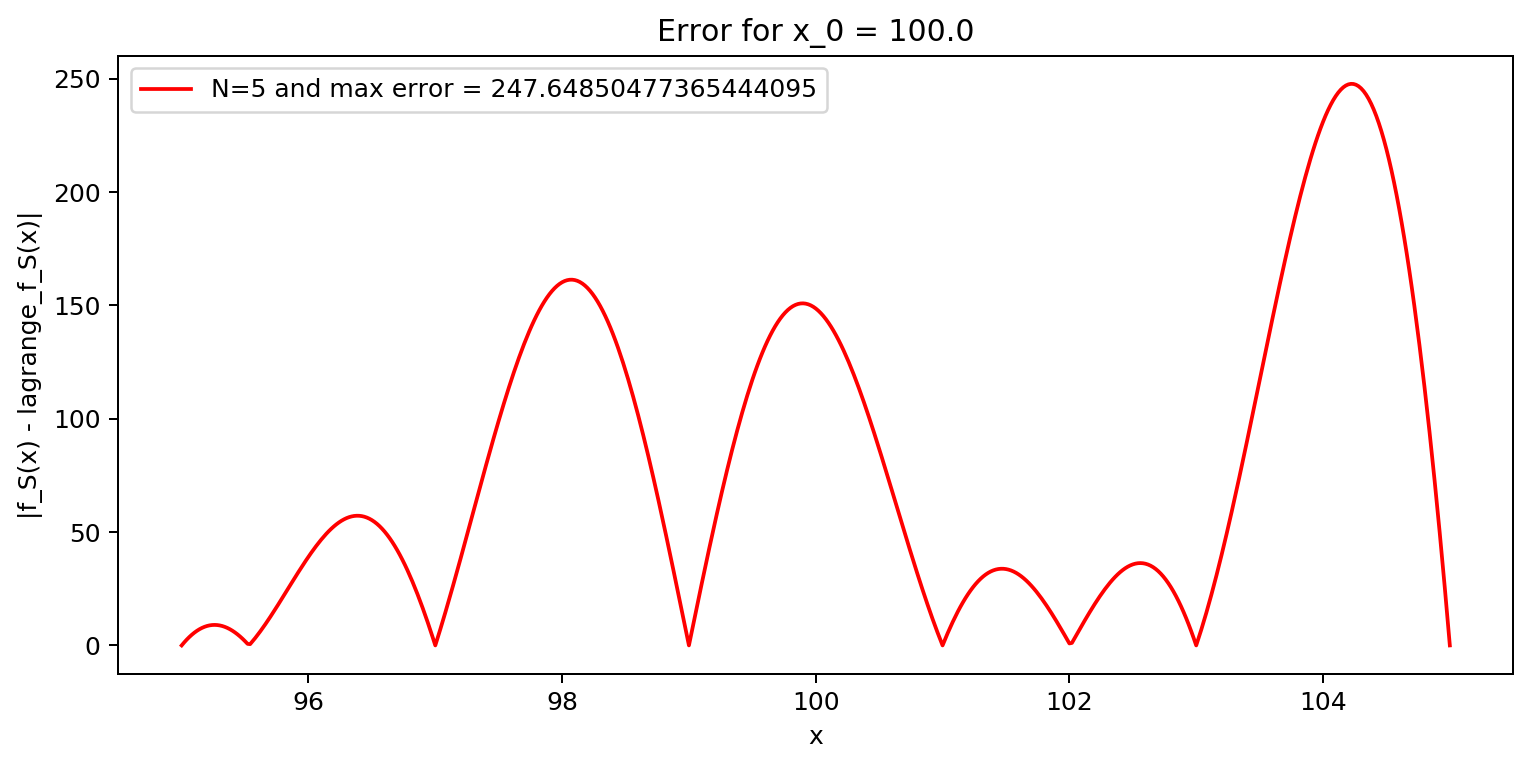

max error = 247.64850477365444095


In [425]:
plt.figure(figsize=(10, 10), dpi=180)
max_error_5 = draw_error(x_0_first, length_first, np.longdouble(5), "red", f_S)
plt.legend(("N=5 and max error = " + str(max_error_5), ""))
plt.show()
print("max error = " + str(max_error_5))

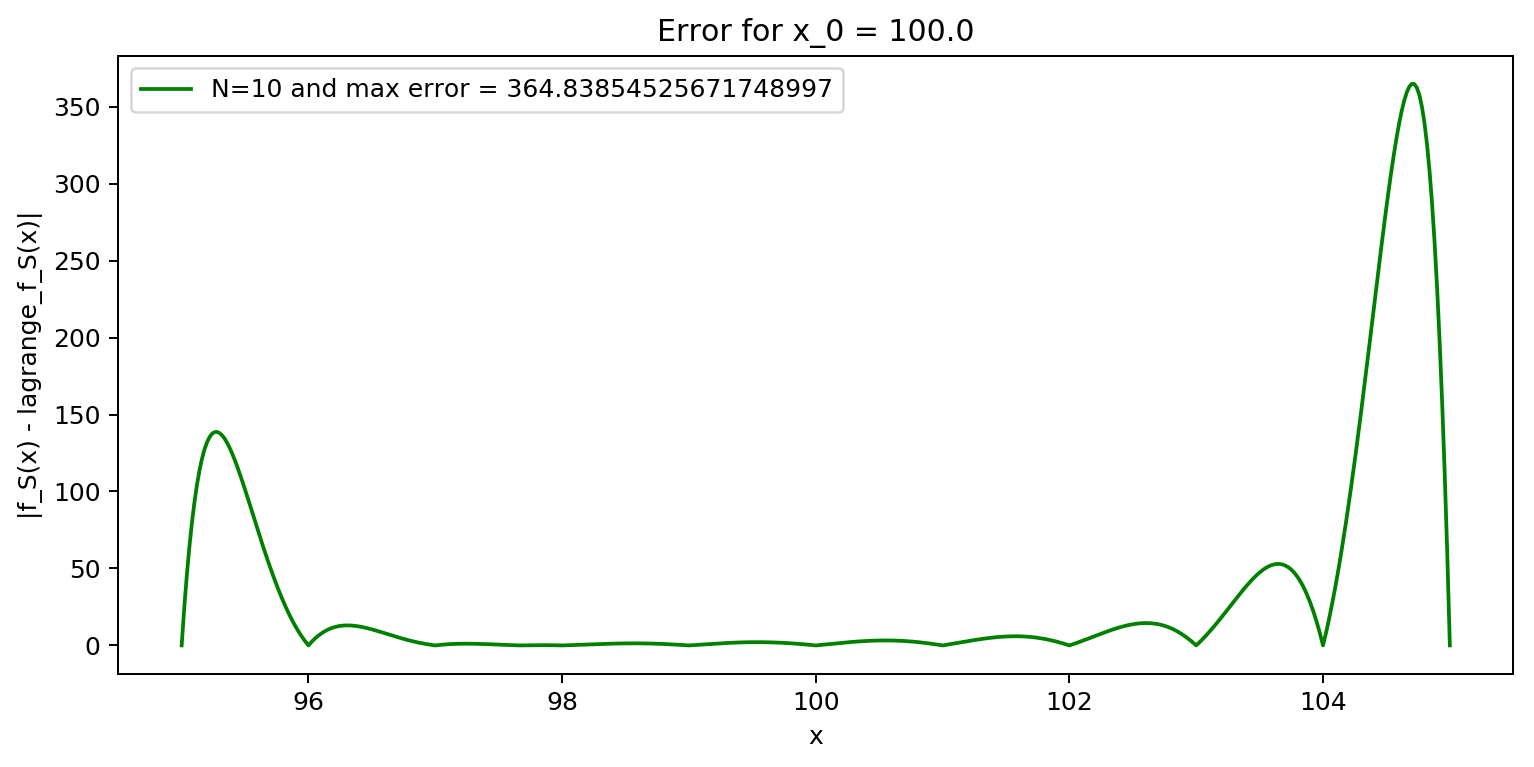

max error = 364.83854525671748997


In [426]:
plt.figure(figsize=(10, 10), dpi=180)
max_error_10 = draw_error(x_0_first, length_first, np.longdouble(10), "green", f_S)
plt.legend(("N=10 and max error = " + str(max_error_10), ""))
plt.show()
print("max error = " + str(max_error_10))

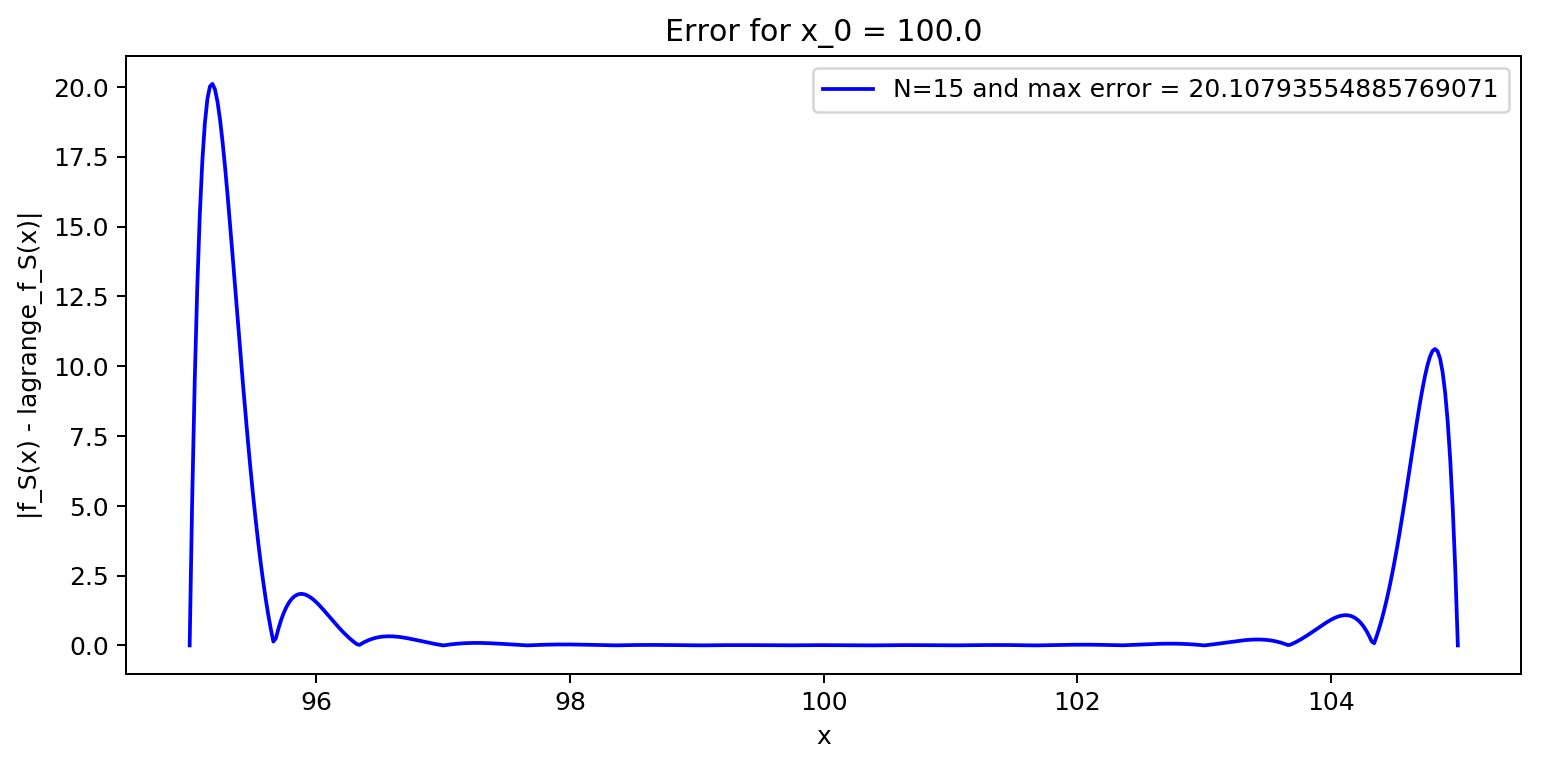

max error = 20.10793554885769071


In [427]:
plt.figure(figsize=(10, 10), dpi=180)
max_error_15 = draw_error(x_0_first, length_first, np.longdouble(15), "blue", f_S)
plt.legend(("N=15 and max error = " + str(max_error_15), ""))
plt.show()
print("max error = " + str(max_error_15))

Как видим, как и было показано на лекции, ошибка на концах растет сильно быстрее, поэтому около точек 95 и 105 мы имеем резкий скачек погрешности.

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


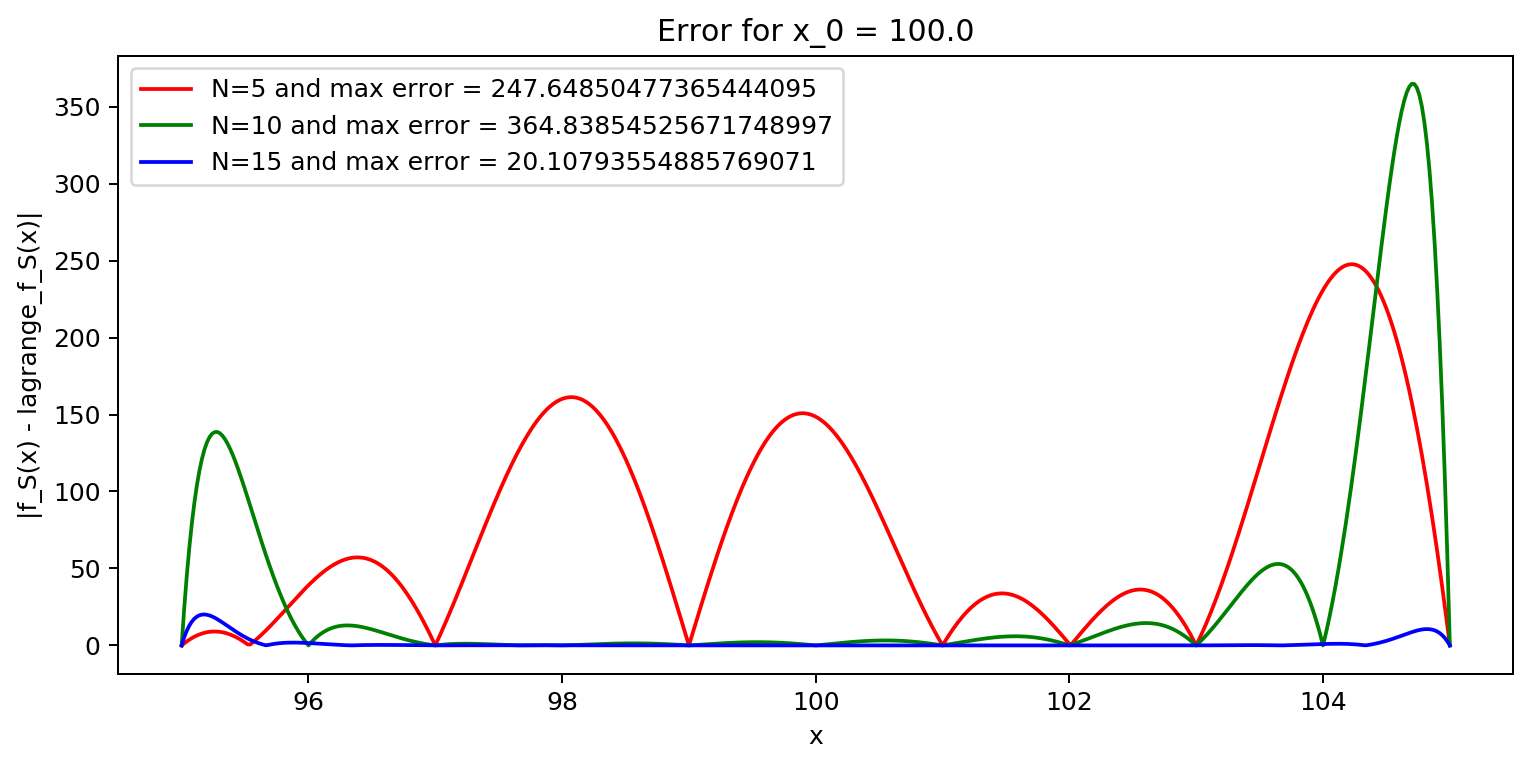

In [429]:
plt.figure(figsize=(10, 10), dpi=180)
max_error_5 = draw_error(x_0_first, length_first, np.longdouble(5), "red", f_S)
max_error_10 = draw_error(x_0_first, length_first, np.longdouble(10), "green", f_S)
max_error_15 = draw_error(x_0_first, length_first, np.longdouble(15), "blue", f_S)
plt.legend(("N=5 and max error = " + str(max_error_5), "N=10 and max error = " + str(max_error_10),
            "N=15 and max error = " + str(max_error_15)))
plt.show()

## Задание 1B

"Построй зависимость максимальной погрешности от N в диапазоне N = 5 - 50"

Для этого используем все, что уже написано, и уберем из draw_error() отрисовку графиков.

In [433]:
def get_max_error(x_0, length, N, f, polinom_getter):
    lagrange_f = polinom_getter(x_0, length, N, f)
    left = x_0 - length
    right = x_0 + length
    data_x = []
    data_y = []
    number_of_points = np.longdouble(500)
    step = 10 / number_of_points
    x_cur = left
    max_error = -1
    while x_cur < right:
        error = abs(f_S(x_cur) - lagrange_f(x_cur))
        max_error = max(max_error, error)
        x_cur += step
    return max_error

In [434]:
def draw_error_correlation_with_N(x_0, length, N_min, N_max, f, polinom_getter):
    data_x = []
    data_y = []
    step = 1
    N_cur = N_min
    while N_cur <= N_max:
        data_x.append(N_cur)
        data_y.append(get_max_error(x_0, length, N_cur, f, polinom_getter))
        N_cur += step
    plt.subplot(211)
    plt.title("max_error(N) for x_0 = " + str(x_0) + " and N from " + str(N_min) + " to " + str(N_max))
    plt.plot(data_x, data_y)
    plt.ylabel("max_error(N)")
    plt.xlabel("N")

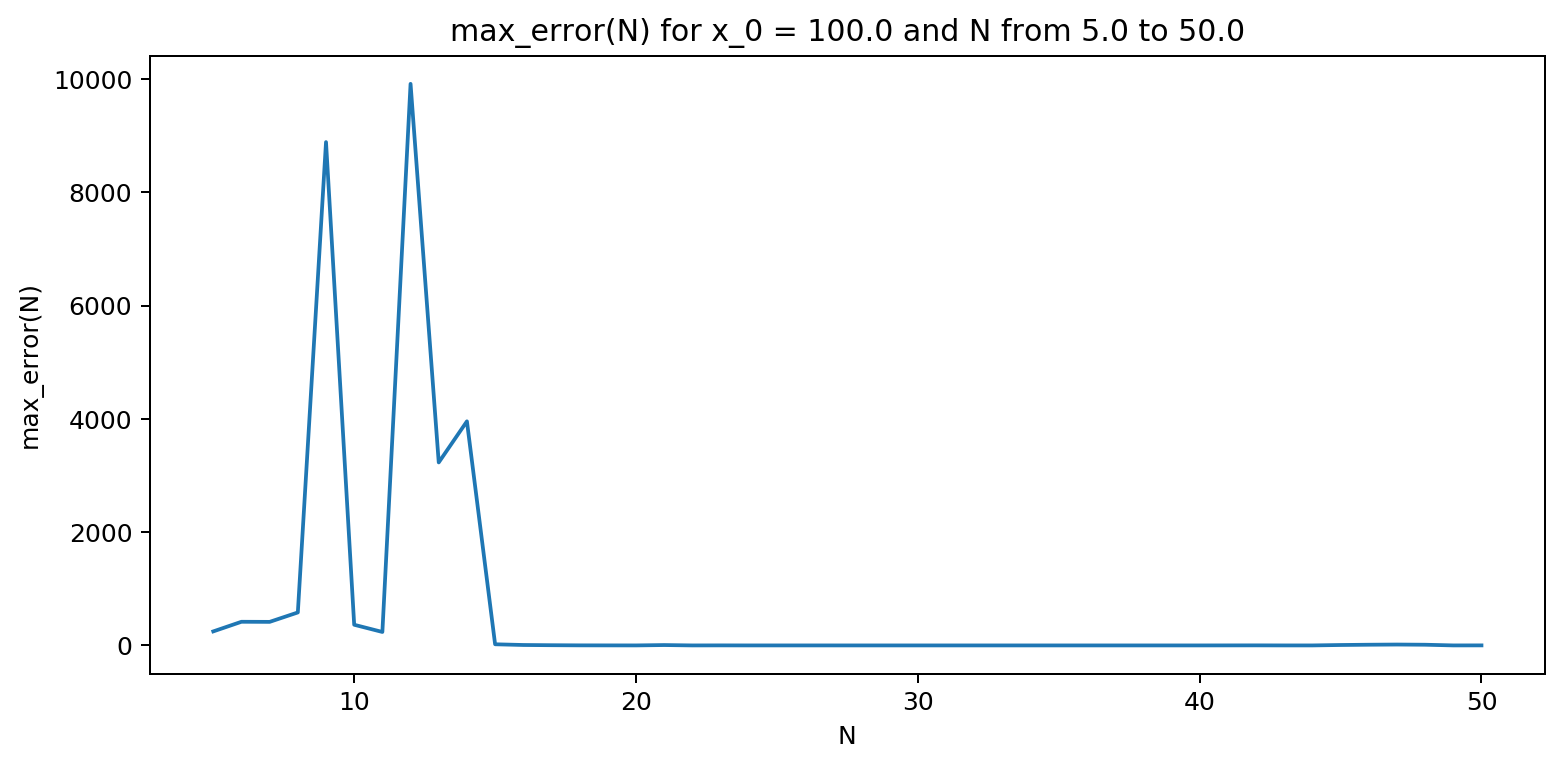

In [435]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_correlation_with_N(x_0_first, length_first, np.longdouble(5), np.longdouble(50), f_S, get_Lagrange_polinom_for_f)
plt.show()

Тут мы видим, что после N=10 максимальная погрешность начинает убывать и становиться близкой к нулю, а до 10 она достаточно высока. Это хорошо согласуется с оценкой на лекции $|f - p_N| \leq \|f^{N+1}\|_C * 1 / C^k_{N + 1} * h^{N + 1}$. 

Так как мы на паре поняли, что макимум достигается на концах, значит k = N, значит оценка получается $\|f^{N+1}\|_C * 1 / (N + 1) * h^{N + 1}$. 

$h = 10 / N$, поэтому при больших N мы в степень $N + 1$ возводим число меньшее 1, а поэтому можем сильно стремится к нулю, как и происходит в нашем случае.

## Задание 1C

Сделать все тоже самое для Чебышевских узлов и сравнить два графика.

In [436]:
def linear_intepolate(a, b, t):
    return np.longdouble(0.5) * (a + b) + np.longdouble(0.5) * (b - a) * t

def get_chebyshev_point(k, N):
    return np.longdouble(math.cos(np.longdouble(math.pi) / 2 * (2 * k - 1) / N))

def get_Chebyshev_polinom_for_f(x_0, length, N, f):
    initial_points = []
    left = x_0 - length
    right = x_0 + length
    for k in range(1, int(N) + 1):
        x_cur = linear_intepolate(left, right, get_chebyshev_point(k, N))
        initial_points.append((x_cur, f(x_cur)))
    return get_Lagrange_polinom(initial_points)

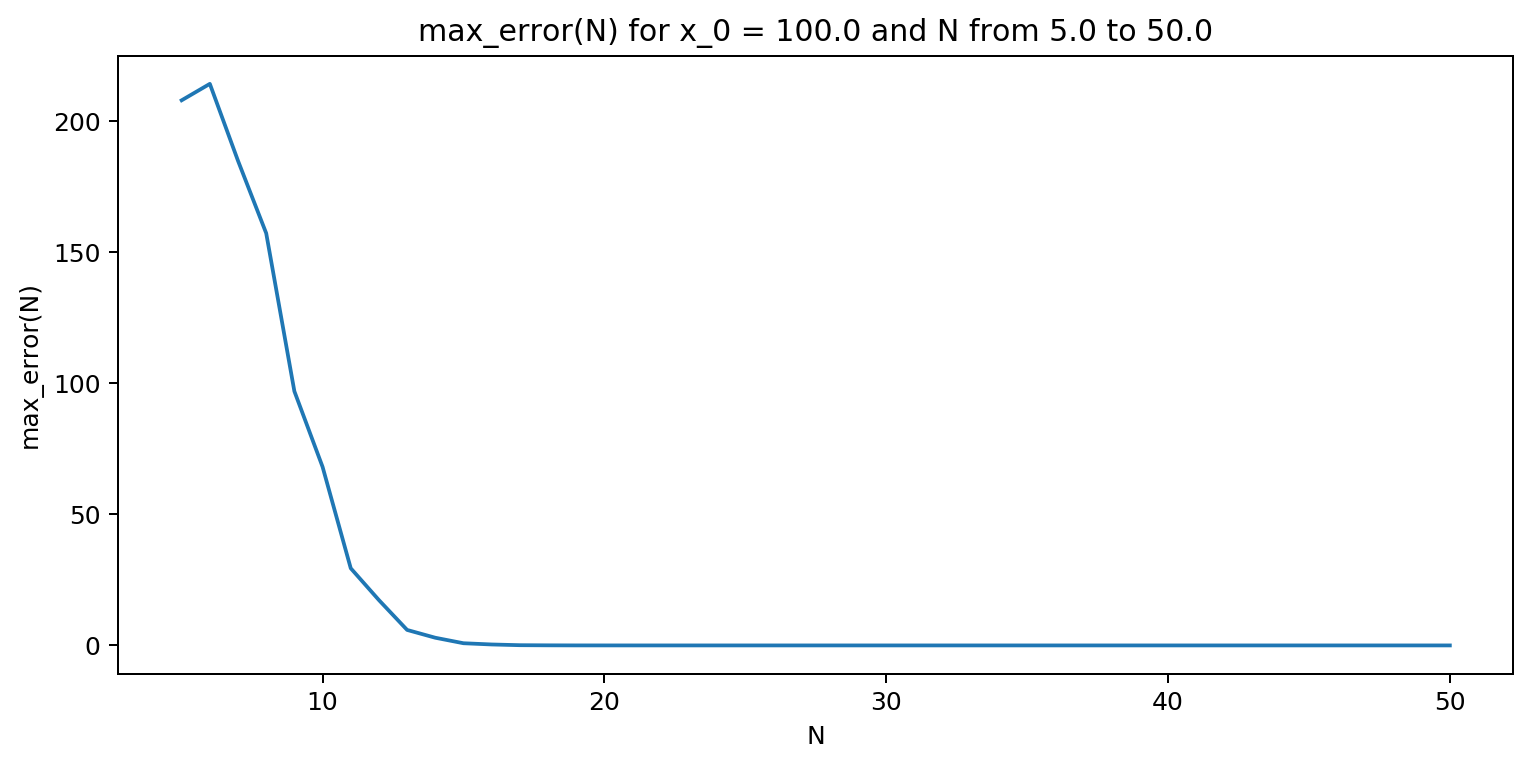

In [437]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_correlation_with_N(x_0_first, length_first, np.longdouble(5), np.longdouble(50), f_S, get_Chebyshev_polinom_for_f)
plt.show()

Нарисуем для наглядности их на одном графике

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


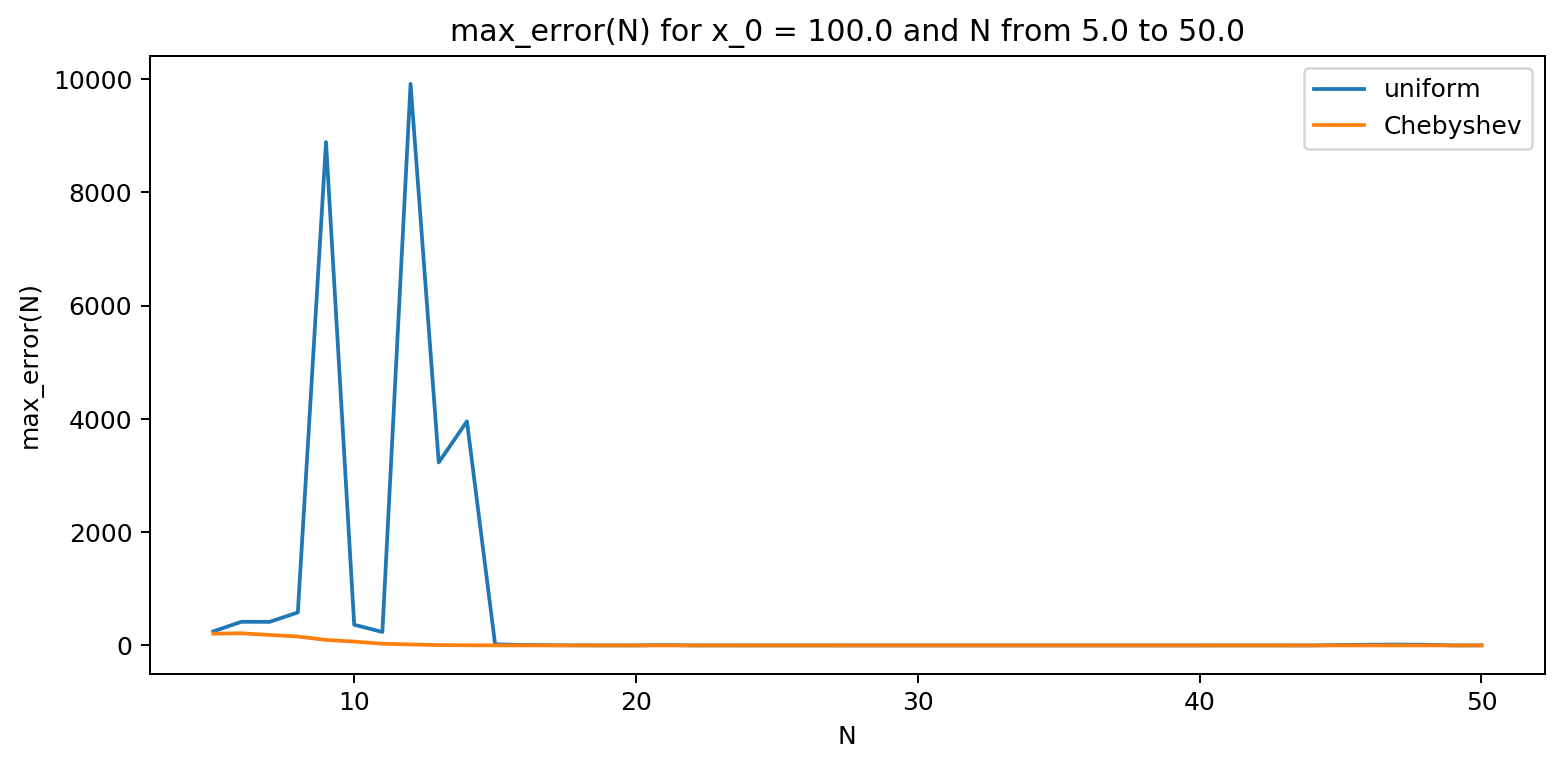

In [438]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_correlation_with_N(x_0_first, length_first, np.longdouble(5), np.longdouble(50), f_S, get_Lagrange_polinom_for_f)
draw_error_correlation_with_N(x_0_first, length_first, np.longdouble(5), np.longdouble(50), f_S, get_Chebyshev_polinom_for_f)
plt.legend(("uniform", "Chebyshev"))
plt.show()

Как видно из графика, у Чебышевских узлов сразу погрешность значительно меньше чем у равномерных. Это происходит из-за того, что базис Чебышева - оптимальный среди всех полиномиальных.

## Задание 1D

Сделать 1B и 1C для функции $f_M = |x - 1|$ на отерзке $[0; 2]$.

In [439]:
x_0_second = 1
length_second = 1

def f_M(x):
    return abs(x - 1)

### Равномерное

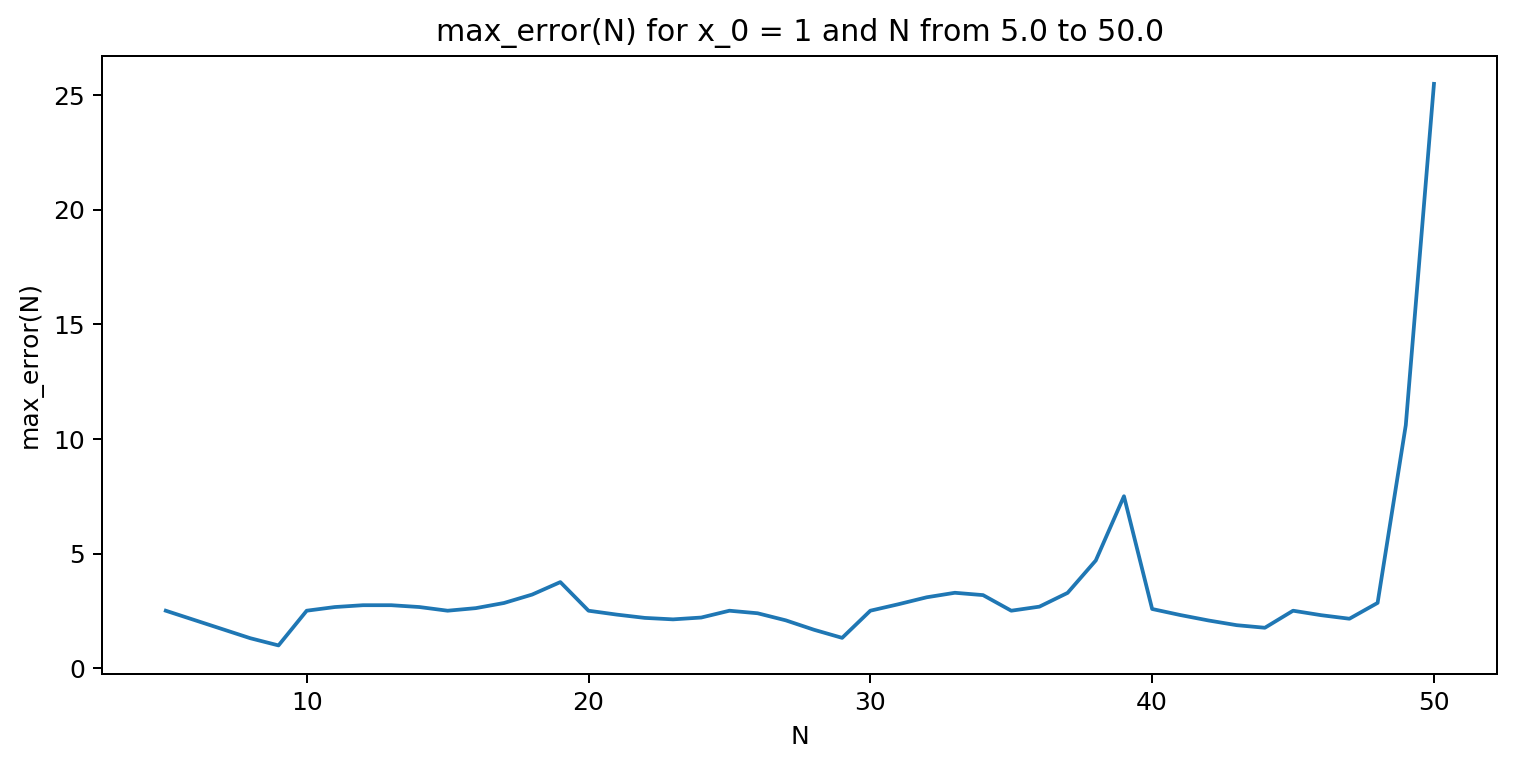

In [440]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_correlation_with_N(x_0_second, length_second, np.longdouble(5), np.longdouble(50), f_M, get_Lagrange_polinom_for_f)
plt.show()

### Чебышев

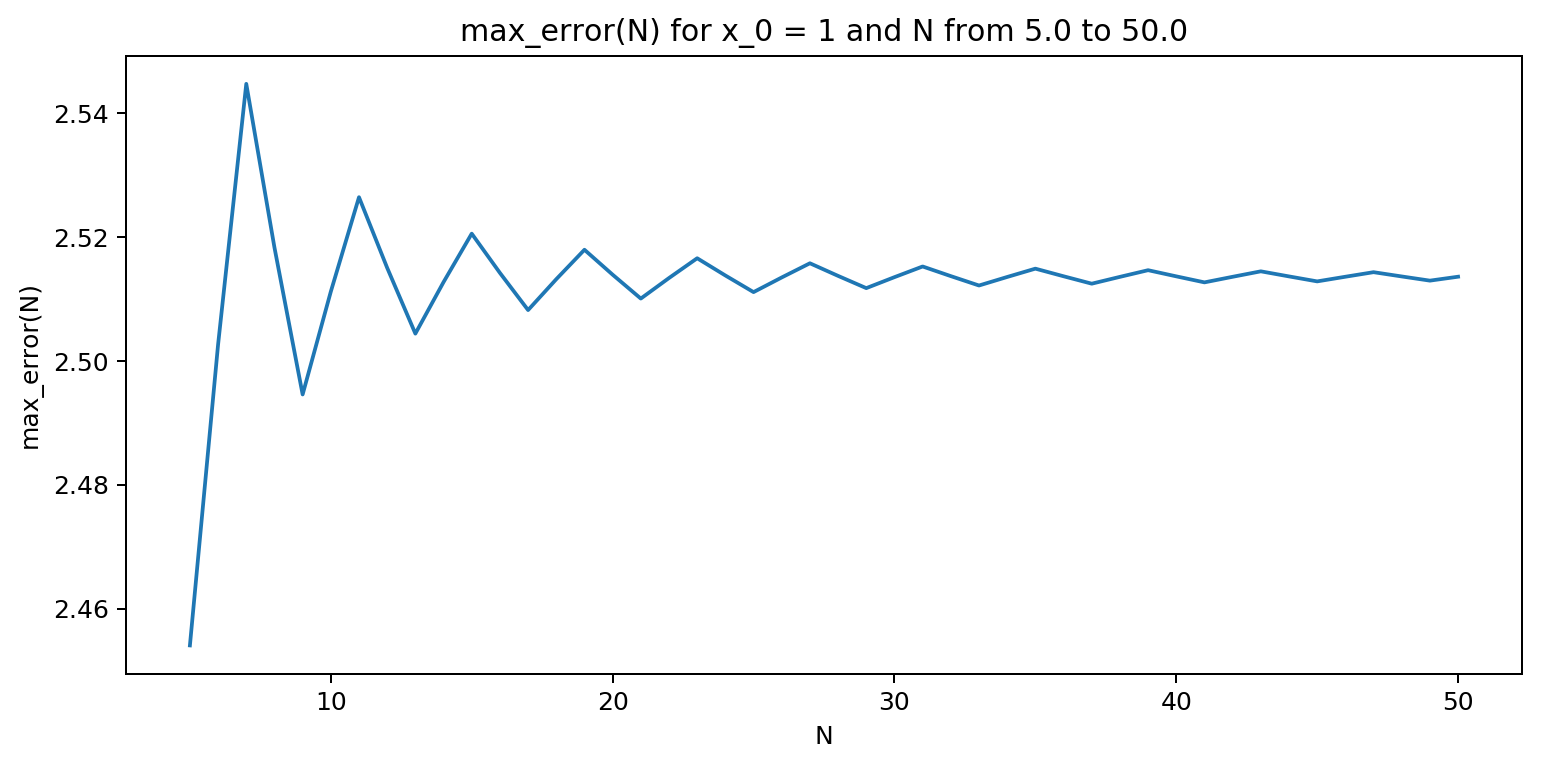

In [441]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_correlation_with_N(x_0_second, length_second, np.longdouble(5), np.longdouble(50), f_M, get_Chebyshev_polinom_for_f)
plt.show()

### Сравнение всех

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


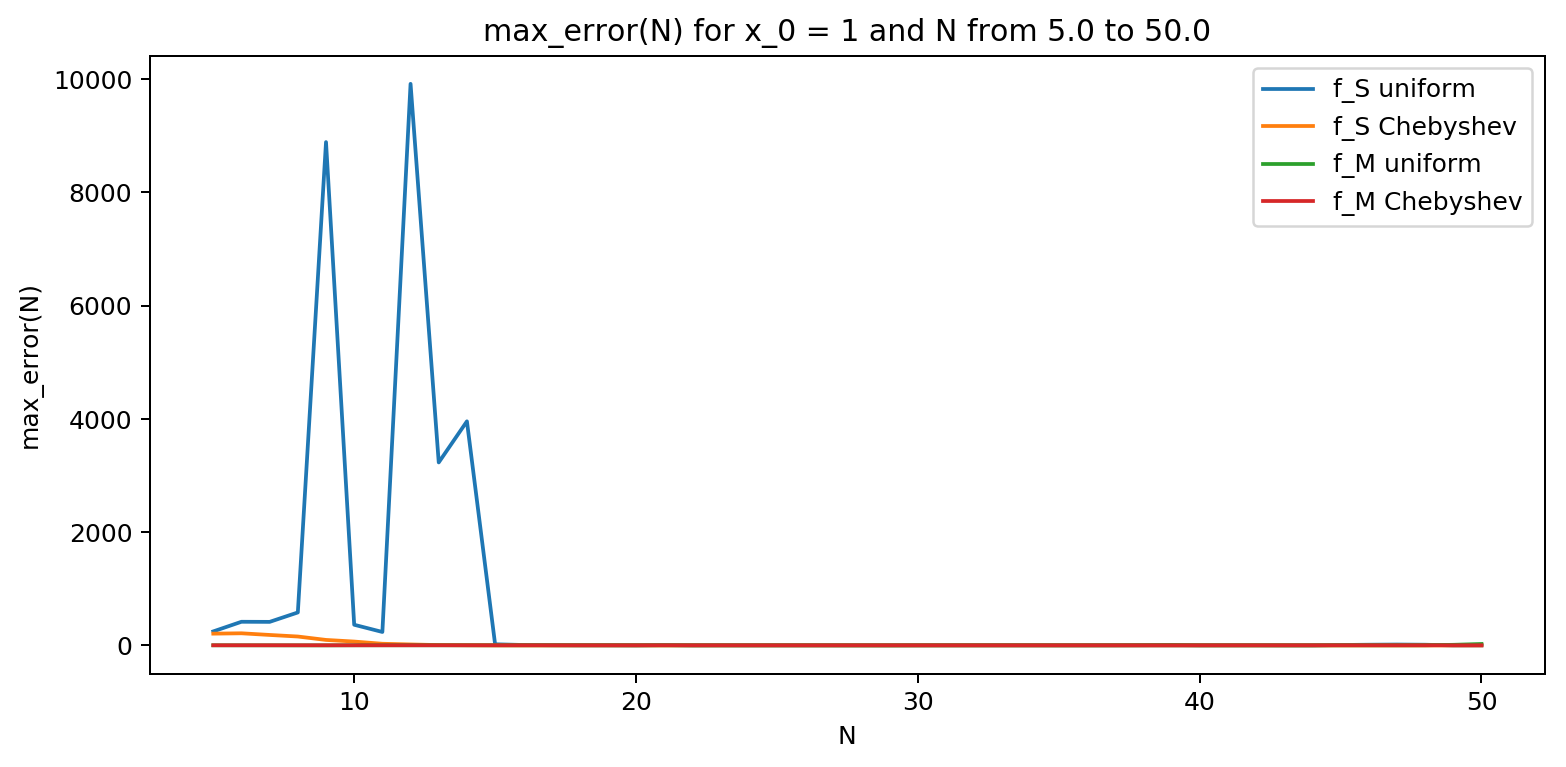

In [442]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_correlation_with_N(x_0_first, length_first, np.longdouble(5), np.longdouble(50), f_S, get_Lagrange_polinom_for_f)
draw_error_correlation_with_N(x_0_first, length_first, np.longdouble(5), np.longdouble(50), f_S, get_Chebyshev_polinom_for_f)
draw_error_correlation_with_N(x_0_second, length_second, np.longdouble(5), np.longdouble(50), f_M, get_Lagrange_polinom_for_f)
draw_error_correlation_with_N(x_0_second, length_second, np.longdouble(5), np.longdouble(50), f_M, get_Chebyshev_polinom_for_f)
plt.legend(("f_S uniform", "f_S Chebyshev", "f_M uniform", "f_M Chebyshev"))
plt.show()

Как видим, очень большая ошибка f_S равномерного делает график ненаглядным, удалим ее.

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


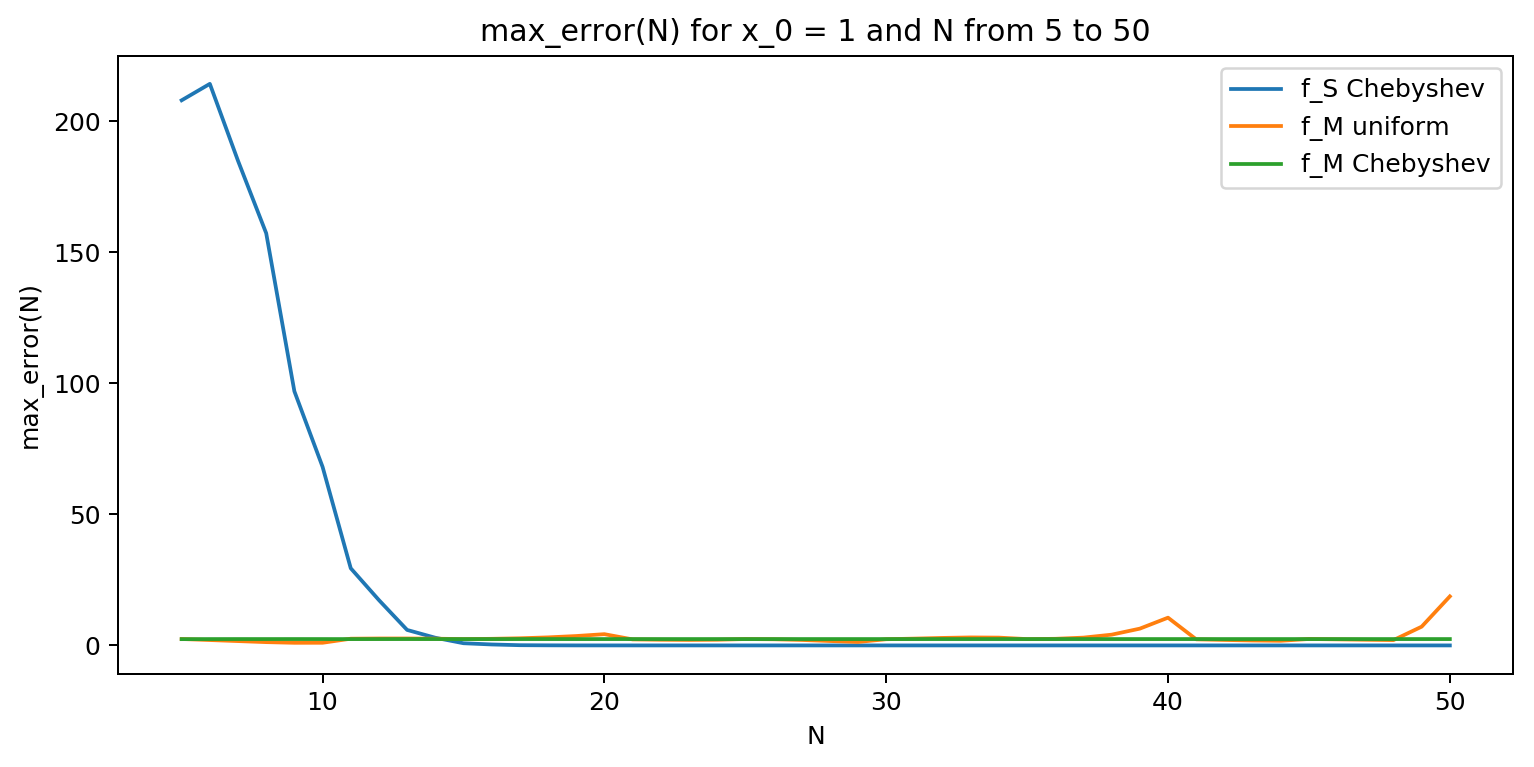

In [352]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_correlation_with_N(x_0_first, length_first, np.longdouble(5), np.longdouble(50), f_S, get_Chebyshev_polinom_for_f)
draw_error_correlation_with_N(x_0_second, length_second, np.longdouble(5), np.longdouble(50), f_M, get_Lagrange_polinom_for_f)
draw_error_correlation_with_N(x_0_second, length_second, np.longdouble(5), np.longdouble(50), f_M, get_Chebyshev_polinom_for_f)
plt.legend(("f_S Chebyshev", "f_M uniform", "f_M Chebyshev"))
plt.show()

Как видно, f_S имеет достаточно большую погрешность при маленьких N. Но потом с ростом N все величины ведут себя одинаково. Посмотрим только на f_M.

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


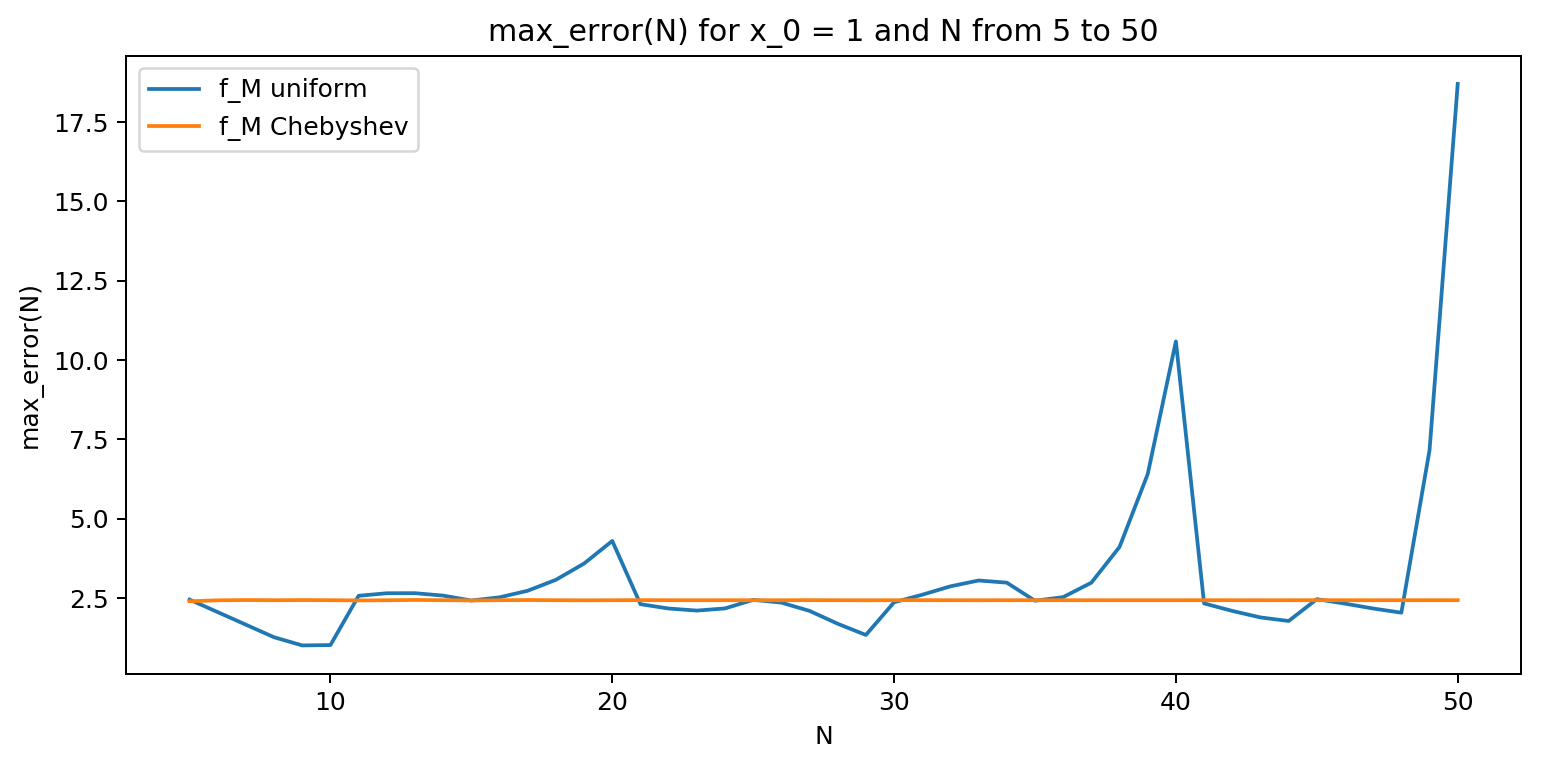

In [354]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_correlation_with_N(x_0_second, length_second, np.longdouble(5), np.longdouble(50), f_M, get_Lagrange_polinom_for_f)
draw_error_correlation_with_N(x_0_second, length_second, np.longdouble(5), np.longdouble(50), f_M, get_Chebyshev_polinom_for_f)
plt.legend(("f_M uniform", "f_M Chebyshev"))
plt.show()

Какого-то четкого убывания у этих двух функций я не вижу, что настораживает, раз в задании это требуется. 

Узлы Чебышева в принципе напоминают константу.